# Step 1: Load Libraries & Dataset
We start buy first loading the necessary libraries for data handling, visualization, modeling, and saving models. Then, I read the CSV dataset into a pandas DataFrame.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset
csv_file = 'house_rentals.csv' 
df = pd.read_csv(csv_file)
df.head()

,url,listing_type,name,price,category,bedrooms,bathrooms,floor_area,location,condition,amenities,region,locality,parking_space,is_furnished,lat,lng
0,https://tonaton.com/a-MfYFNdCgCTytOcmvZIh0Kzrj...,rentals,"2bdrm Apartment in Charclem Ventures, East Leg...",9196,Flats,2.0,2.0,145.0,"Greater Accra, East Legon",Used,"24-hour Electricity,Air Conditioning,Balcony,C...",Greater Accra,East Legon,False,Semi-Furnished,5.635828,-0.161359
1,https://tonaton.com/a-MfYFNdCgwtb8Itol9odpMPvC...,rentals,"2bdrm Apartment in , Dzorwulu for rent",7500,Flats,2.0,2.0,100.0,"Greater Accra, Dzorwulu",Used,"24-hour Electricity,Air Conditioning,Apartment...",Greater Accra,Dzorwulu,False,Unfurnished,5.614123,-0.195647
2,https://tonaton.com/a-MfYFNdCgPjnzPYwNFEv5JrGy...,rentals,"4bdrm House in Lakeside Estate, for Rent",11200,Detached,4.0,5.0,100.0,"Greater Accra, Ashaley Botwe, Lake Side Estate",New,"Tiled Floor,Chandelier,Dining Area,Balcony,Pop...",Greater Accra,Ashaley Botwe,False,Semi-Furnished,5.680213,-0.137248
3,https://tonaton.com/a-MfYFNdCgwmXHQRNJiSR3rok8...,rentals,"3bdrm House in Ayathar Bedroom, Teshie for Rent",2500,Detached,3.0,3.0,17.0,"Greater Accra, Teshie",Used,"Pop Ceiling,Pre-Paid Meter,24-hour Electricity...",Greater Accra,Teshie,False,Semi-Furnished,5.583166,-0.104608
4,https://tonaton.com/a-MfYFNdCgn3Bcs511lKnFE19i...,rentals,"3bdrm House in Manet Viile Estate, Spintex for...",9146,Detached,3.0,3.0,160.0,"Greater Accra, Spintex",Used,"Pre-Paid Meter,Dining Area,Chandelier,Balcony,...",Greater Accra,Spintex,False,Semi-Furnished,5.637614,-0.126606


# Step 2: Handle Missing Values

I filled missing numeric features using the median, and categorical features with 'Unknown'.
This ensures the dataset is clean and ready for modeling without losing too much information.

In [2]:
# Numeric missing values
numeric_cols = ['price','bedrooms','bathrooms','floor_area','lat','lng']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical missing values
categorical_cols = ['listing_type','category','condition','amenities','region','locality','is_furnished','parking_space']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)


C:\Users\winst\AppData\Local\Temp\ipykernel_5356\3463981587.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\winst\AppData\Local\Temp\ipykernel_5356\3463981587.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

# Step 3: Feature Engineering & Encoding

I removed irrelevant columns (url, name, location) and one-hot encoded categorical features.
This ensures all inputs are numeric for the machine learning models.

In [ ]:
# Dropping irrelevant columns
df.drop(columns=['url','name','location'], inplace=True)

# encoding categorical features
categorical_cols = ['listing_type','category','condition','amenities','region','locality','is_furnished','parking_space']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", df_encoded.shape)

df_encoded.head()


Shape after encoding: (17890, 7664)


,price,bedrooms,bathrooms,floor_area,lat,lng,category_Duplex,category_Flats,category_Mansion,category_Semi-Detached,...,locality_Tantra Hills,locality_Tarkwa Nsuaem,locality_Tema Metropolitan,locality_Tesano,locality_Teshie,locality_Weija,locality_West Legon,is_furnished_Semi-Furnished,is_furnished_Unfurnished,parking_space_True
0,9196,2.0,2.0,145.0,5.635828,-0.161359,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,7500,2.0,2.0,100.0,5.614123,-0.195647,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,11200,4.0,5.0,100.0,5.680213,-0.137248,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2500,3.0,3.0,17.0,5.583166,-0.104608,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,9146,3.0,3.0,160.0,5.637614,-0.126606,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Step 4: Visualize Dataset

Visualizations to understand feature relationships and the target distribution.

Shape after encoding: (17890, 147)

Top 19 features correlated with price:
1. bathrooms: 0.5217
2. bedrooms: 0.4890
3. amenity_Microwave: 0.4791
4. amenity_Air_Conditioning: 0.4684
5. amenity_Refrigerator: 0.4674
6. amenity_Wardrobe: 0.4110
7. amenity_TV: 0.4054
8. amenity_Hot_Water: 0.4010
9. category_Flats: 0.3765
10. locality_Cantonments: 0.3146
11. amenity_Wi-Fi: 0.3034
12. amenity_Chandelier: 0.3017
13. amenity_Dining_Area: 0.2885
14. is_furnished_Unfurnished: 0.2529
15. locality_East Legon: 0.2512
16. amenity_Balcony: 0.2262
17. category_Townhouse: 0.2195
18. locality_Airport Residential Area: 0.2192
19. amenity_Apartment: 0.1942


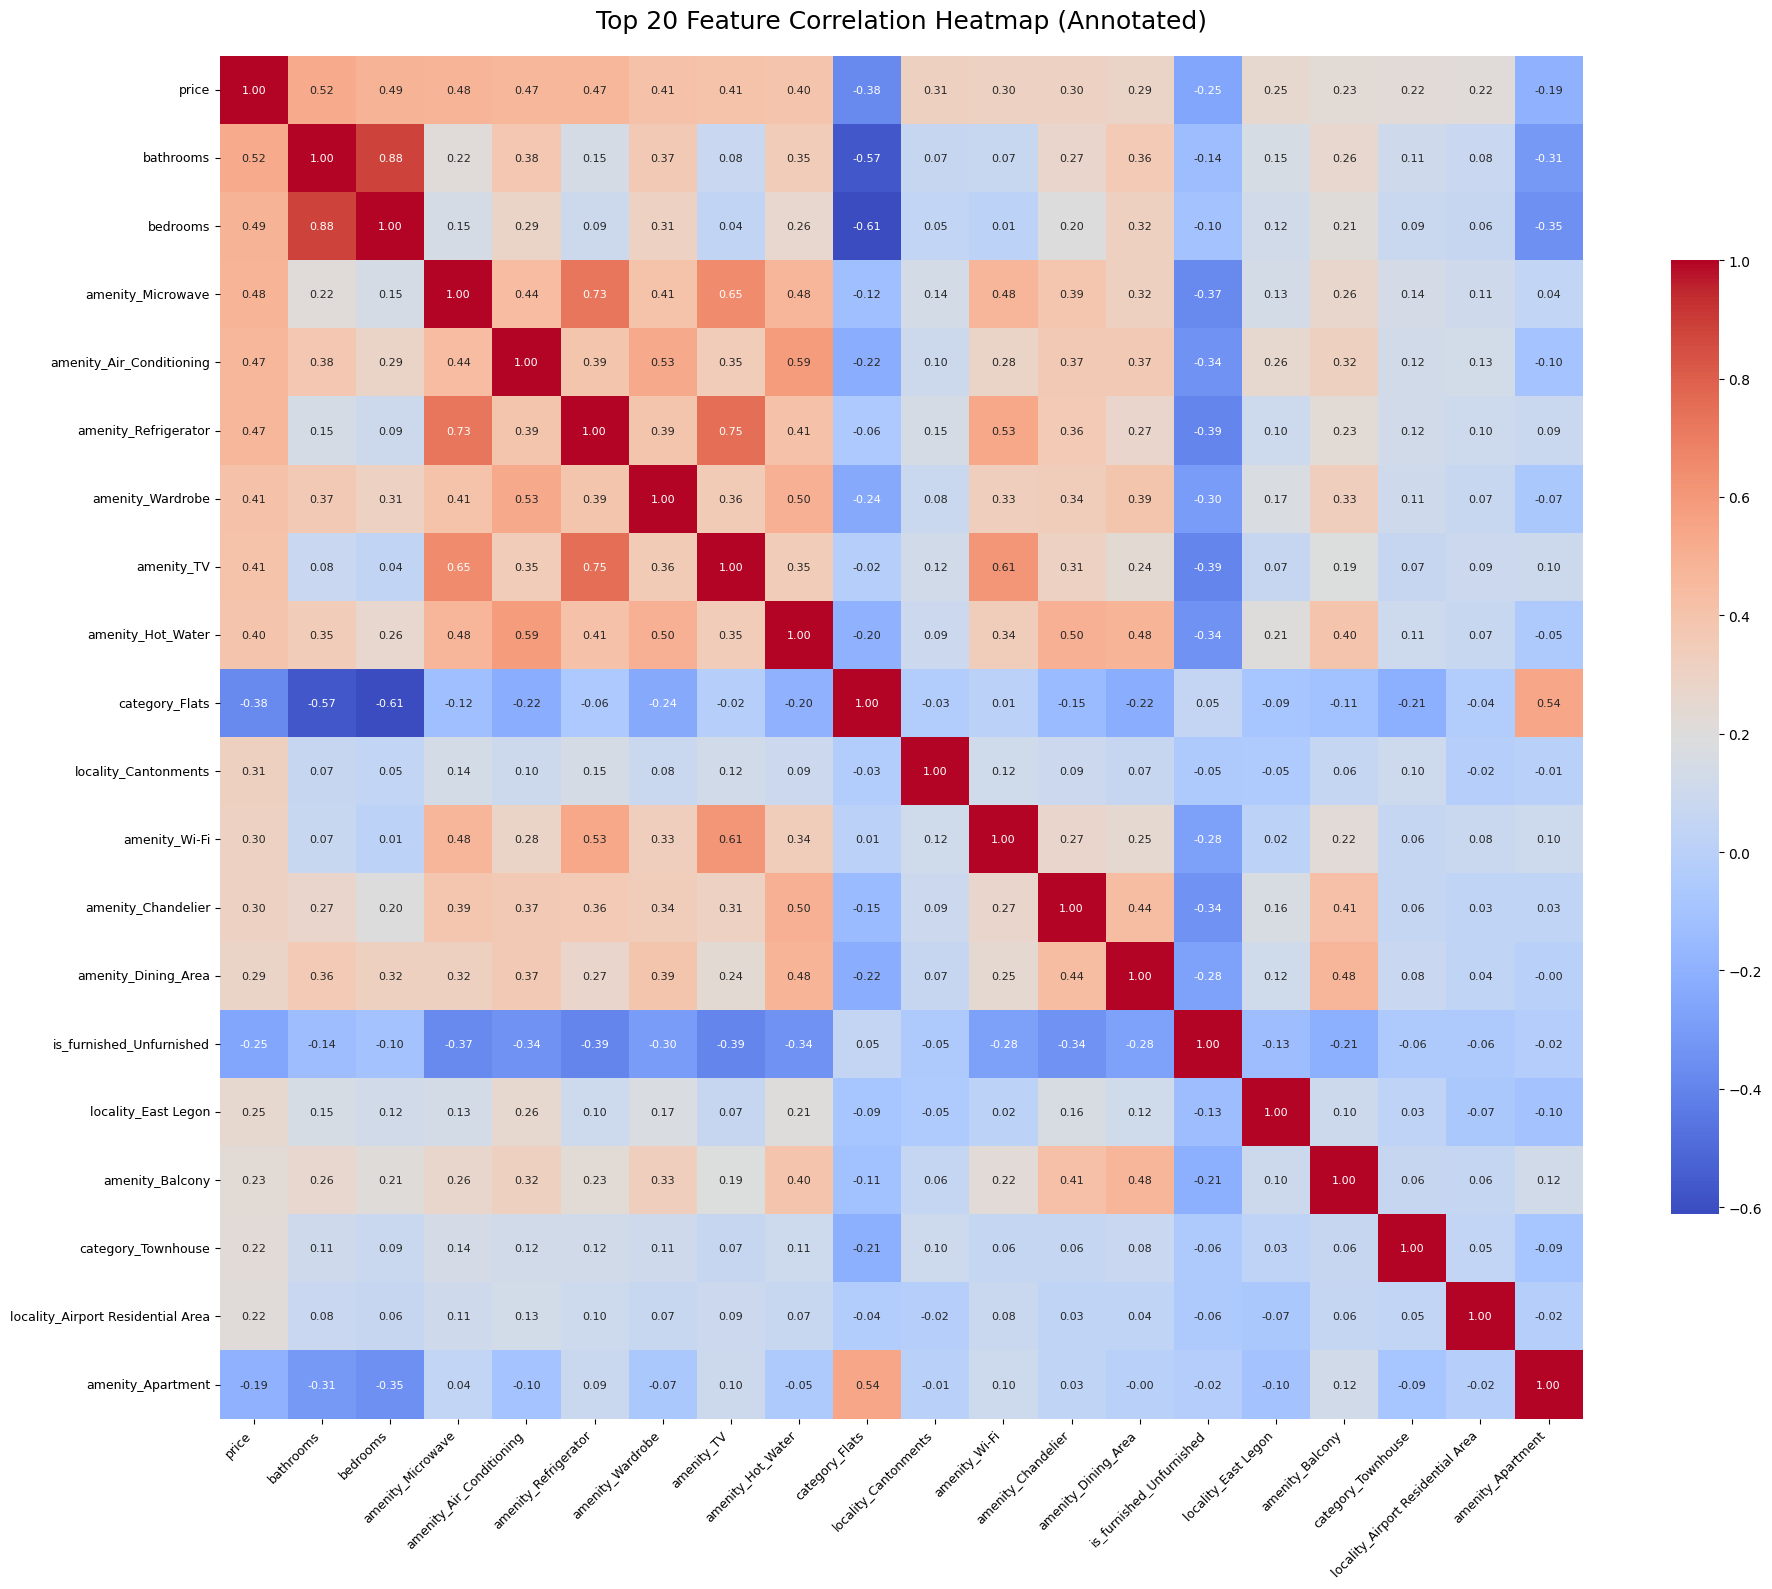

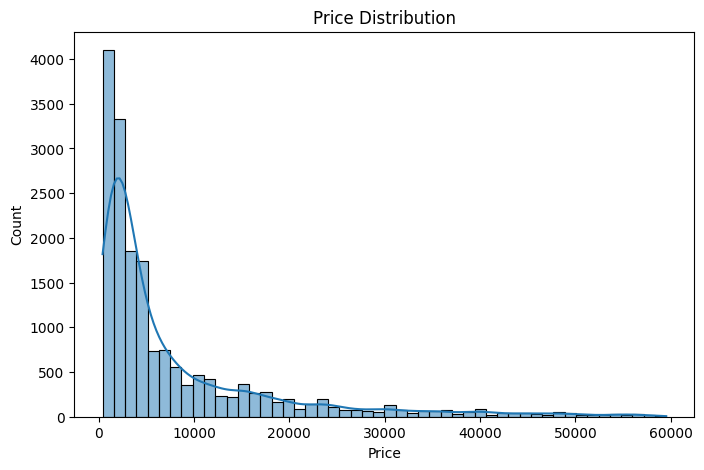

In [9]:
# FIX AMENITIES ENCODING

if 'amenities' in df.columns:
    print("Splitting amenities into binary columns...")

    df['amenities_list'] = df['amenities'].fillna("").apply(lambda x: [a.strip() for a in x.split(',')])
    
    all_amenities = sorted(set(a for sub in df['amenities_list'] for a in sub if a != ""))

    for amenity in all_amenities:
        df[f"amenity_{amenity.replace(' ', '_')}"] = df['amenities_list'].apply(lambda x: amenity in x)

    df.drop(columns=['amenities_list', 'amenities'], errors='ignore', inplace=True)

# Encode remaining object columns
object_cols = df.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=True)
else:
    df_encoded = df.copy()

print("Shape after encoding:", df_encoded.shape)


# CORRELATION CALCULATION

target = df_encoded['price']
correlations = {}

for col in df_encoded.columns:
    if col != 'price':
        correlations[col] = df_encoded[col].corr(target)

corr_target = pd.Series(correlations).abs().sort_values(ascending=False)

top_features = ['price'] + corr_target.index[:19].tolist()
print("\nTop 19 features correlated with price:")
for i, feat in enumerate(corr_target.index[:19], 1):
    print(f"{i}. {feat}: {corr_target[feat]:.4f}")

top_corr_matrix = df_encoded[top_features].corr()


# HEATMAP 

plt.figure(figsize=(20, 16))

ax = sns.heatmap(
    top_corr_matrix,
    cmap='coolwarm',
    square=True,
    annot=True,          
    fmt=".2f",           
    annot_kws={"size": 8},   
    cbar_kws={"shrink": 0.7}
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)

plt.title("Top 20 Feature Correlation Heatmap (Annotated)", fontsize=18, pad=20)
plt.tight_layout()
plt.show()

# Plot target distribution
plt.figure(figsize=(8,5))
sns.histplot(df_encoded['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()


# Step 5: Split Features & Target, Standardize

I separate the features and target, then standardize numeric inputs to ensure all models converge efficiently.

In [5]:
# Features & Target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save feature names for API
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Shapes:", X_train_scaled.shape, X_test_scaled.shape)
print("Saved feature names:", feature_names[:10], "...")


Shapes: (14312, 146) (3578, 146)
Saved feature names: ['bedrooms', 'bathrooms', 'floor_area', 'parking_space', 'lat', 'lng', 'amenity_24-hour_Electricity', 'amenity_Air_Conditioning', 'amenity_Apartment', 'amenity_Balcony'] ...


# Step 6: Gradient Descent Linear Regression Implementation

I implemented gradient descent manually to visualize loss convergence over iterations.

MSE Gradient Descent LR: 42300700.41831946


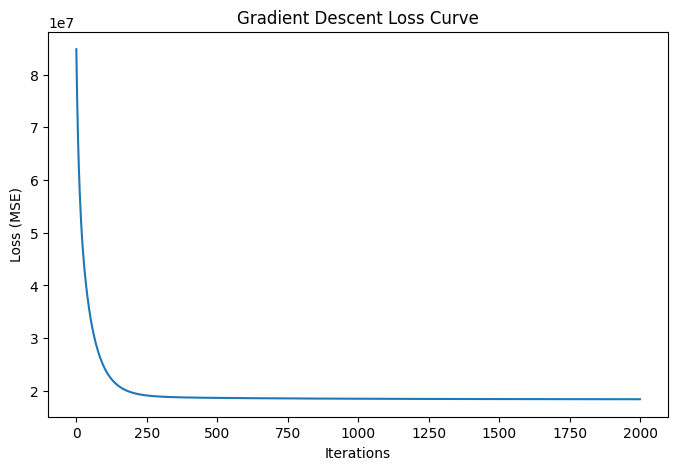

In [6]:
class GradientDescentLinearRegression:
    def __init__(self, lr=0.01, n_iters=2000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            loss = (1/(2*n_samples)) * np.sum((y_pred - y)**2)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train model
gd_lr = GradientDescentLinearRegression()
gd_lr.fit(X_train_scaled, y_train)
y_pred_gd = gd_lr.predict(X_test_scaled)
mse_gd = mean_squared_error(y_test, y_pred_gd)
print("MSE Gradient Descent LR:", mse_gd)

# Plot loss curve
plt.figure(figsize=(8,5))
plt.plot(gd_lr.loss_history)
plt.title("Gradient Descent Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.show()


# Step 7: Standard Linear Regression (Sklearn)

In this step, I train **Linear Regression**, **Decision Tree**, and **Random Forest** models on the training data.  
We then visualize predictions for Linear Regression and Random Forest to intuitively assess performance.

MSE Linear Regression (sklearn): 42082043.69971848


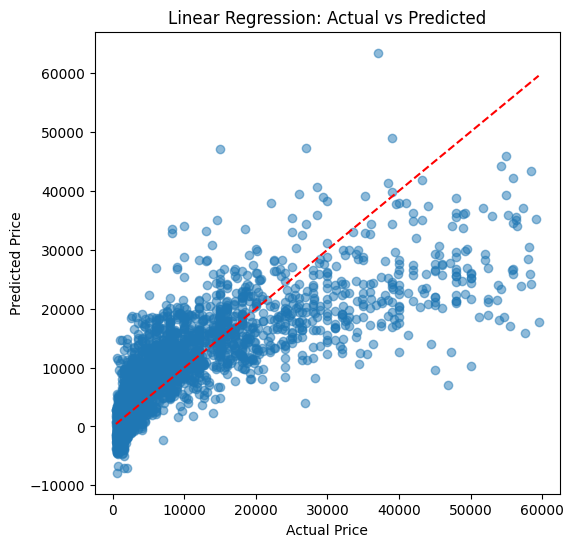

MSE Decision Tree: 55459739.44602502
MSE Random Forest: 32618903.192599803


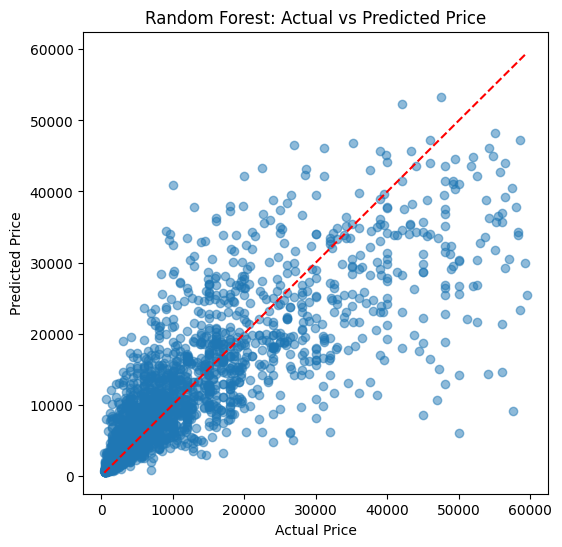

In [7]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("MSE Linear Regression (sklearn):", mse_lr)

# Scatter plot for Linear Regression
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("MSE Decision Tree:", mse_dt)


# Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE Random Forest:", mse_rf)

# Scatter plot for Random Forest
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Price")
plt.show()

# Step 8: Save Best Model & Test Single Prediction

In this step, I select the model with the lowest Mean Squared Error (MSE) on the test set,  
save it along with the scaler for deployment, and test prediction on a single data point. 

In [8]:

# Determine the best model

model_mse = {
    'Linear Regression': mse_lr,
    'Decision Tree': mse_dt,
    'Random Forest': mse_rf
}

best_model_name = min(model_mse, key=model_mse.get)
print("Best model based on MSE:", best_model_name)

if best_model_name == 'Linear Regression':
    best_model = lr
elif best_model_name == 'Decision Tree':
    best_model = dt
else:
    best_model = rf


# Saving the best model and scaler

import joblib

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_names, 'feature_names.pkl')
print("Best model, scaler, and feature names saved successfully.")


# Test single prediction

sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
sample_prediction = best_model.predict(sample_scaled)
print("Predicted price for a single sample:", float(sample_prediction[0]))
print("Actual price:", float(y_test.iloc[0]))

Best model based on MSE: Random Forest
Best model, scaler, and feature names saved successfully.
Predicted price for a single sample: 2916.333333333334
Actual price: 2000.0


## Step 9: Interpretation

- The **best model** is chosen based on test set MSE to ensure the most accurate predictions.  
- **Linear Regression** provides a simple baseline and is interpretable.  
- **Decision Tree** can capture non-linear relationships but may overfit.  
- **Random Forest** often performs best due to ensembling multiple trees, reducing overfitting and variance.  
- **Scatter plots** help visualize prediction accuracy; points closer to the red dashed line are better predicted.  
- Testing a **single prediction** confirms that the saved model can be used later for API calls or deployment.  
- This workflow ensures the model is ready for production and can handle real-world data from the Flutter app.